In [1]:
import pandas as pd

df = pd.read_csv('ViewingActivity.csv')

In [2]:
df.shape

(43134, 10)

In [3]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Grandpa,2021-09-12 14:41:50,00:23:22,NaN,The 100: Season 1: The Calm (Episode 11),NaN,Chrome PC (Cadmium),00:36:36,00:36:36,CO (Colombia)
1,Grandpa,2021-09-12 00:14:47,00:12:30,NaN,The 100: Season 1: The Calm (Episode 11),NaN,Chrome PC (Cadmium),00:13:14,Not latest view,CO (Colombia)
2,Grandpa,2021-09-11 23:33:55,00:40:51,NaN,The 100: Season 1: I Am Become Death (Episode 10),NaN,Chrome PC (Cadmium),00:41:12,00:41:12,CO (Colombia)
3,Grandpa,2021-09-11 23:00:09,00:33:44,NaN,The 100: Season 1: Unity Day (Episode 9),NaN,Chrome PC (Cadmium),00:39:41,00:39:41,CO (Colombia)
4,Grandpa,2021-09-11 20:33:52,00:05:07,NaN,The 100: Season 1: Unity Day (Episode 9),NaN,Chrome PC (Cadmium),00:05:56,Not latest view,CO (Colombia)


In [4]:
# Dropping everything as the Netflix example except 'Profile Names' for later analysis
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head(1)

,Profile Name,Start Time,Duration,Title
0,Grandpa,2021-09-12 14:41:50,00:23:22,The 100: Season 1: The Calm (Episode 11)


In [5]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
dtype: object

In [6]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('US/Eastern')

df = df.reset_index()

df.head(1)

,Start Time,Profile Name,Duration,Title
0,2021-09-12 10:41:50-04:00,Grandpa,00:23:22,The 100: Season 1: The Calm (Episode 11)


In [7]:
df['Duration'] = pd.to_timedelta(df['Duration'])

df.dtypes

Start Time      datetime64[ns, US/Eastern]
Profile Name                        object
Duration                   timedelta64[ns]
Title                               object
dtype: object

In [8]:
# Identifying the months in my Data

df.loc[0, 'Start Time'].month_name()

'September'

In [9]:
# Making a column of months and checking

df['Month'] = df['Start Time'].dt.month_name()

df.head(400)

,Start Time,Profile Name,Duration,Title,Month
0,2021-09-12 10:41:50-04:00,Grandpa,0 days 00:23:22,The 100: Season 1: The Calm (Episode 11),September
1,2021-09-11 20:14:47-04:00,Grandpa,0 days 00:12:30,The 100: Season 1: The Calm (Episode 11),September
2,2021-09-11 19:33:55-04:00,Grandpa,0 days 00:40:51,The 100: Season 1: I Am Become Death (Episode 10),September
3,2021-09-11 19:00:09-04:00,Grandpa,0 days 00:33:44,The 100: Season 1: Unity Day (Episode 9),September
4,2021-09-11 16:33:52-04:00,Grandpa,0 days 00:05:07,The 100: Season 1: Unity Day (Episode 9),September
...,...,...,...,...,...
395,2018-12-29 08:05:39-05:00,Grandpa,0 days 00:02:52,Seven in Heaven,December
396,2018-12-29 08:04:03-05:00,Grandpa,0 days 00:00:07,Nothing to Hide,December
397,2018-12-29 07:14:24-05:00,Grandpa,0 days 00:41:38,Standoff,December
398,2018-12-28 22:29:47-05:00,Grandpa,0 days 00:38:50,Standoff,December


In [10]:
# Statistical Analysis with Dates

print('Account Start Date:', df['Start Time'].min())
print('Most Recent Watch Date:', df['Start Time'].max())

print('Age of our account:', df['Start Time'].max() - df['Start Time'].min())

print('Average Date:', df['Start Time'].mean())

print('Median Date:', df['Start Time'].median())

print('Standard Deviation of Dates:', df['Start Time'].std())

Account Start Date: 2010-11-28 14:49:28-05:00
Most Recent Watch Date: 2022-03-15 21:16:00-04:00
Age of our account: 4125 days 05:26:32
Average Date: 2017-03-27 18:02:03.290165760-04:00
Median Date: 2017-04-17 13:25:02-04:00
Standard Deviation of Dates: 1088 days 05:34:54.724453040


In [11]:
# Monthly Summary

month_list = []

January = df[df['Month'].str.contains('January', regex=True)]
print('Watched', January['Month'].count(), 'times in January')
month_list.append(January['Month'].count())

February = df[df['Month'].str.contains('February', regex=True)]
print('Watched', February['Month'].count(), 'times in February')
month_list.append(February['Month'].count())

March = df[df['Month'].str.contains('March', regex=True)]
print('Watched', March['Month'].count(), 'times in March')
month_list.append(March['Month'].count())

April = df[df['Month'].str.contains('April', regex=True)]
print('Watched', April['Month'].count(), 'times in April')
month_list.append(April['Month'].count())

May = df[df['Month'].str.contains('May', regex=True)]
print('Watched', May['Month'].count(), 'times in May')
month_list.append(May['Month'].count())

June = df[df['Month'].str.contains('June', regex=True)]
print('Watched', June['Month'].count(), 'times in June')
month_list.append(June['Month'].count())

July = df[df['Month'].str.contains('July', regex=True)]
print('Watched', July['Month'].count(), 'times in July')
month_list.append(July['Month'].count())

August = df[df['Month'].str.contains('August', regex=True)]
print('Watched', August['Month'].count(), 'times in August')
month_list.append(August['Month'].count())

September = df[df['Month'].str.contains('September', regex=True)]
print('Watched', September['Month'].count(), 'times in September')
month_list.append(September['Month'].count())

October = df[df['Month'].str.contains('October', regex=True)]
print('Watched', October['Month'].count(), 'times in October')
month_list.append(October['Month'].count())

November = df[df['Month'].str.contains('November', regex=True)]
print('Watched', November['Month'].count(), 'times in November')
month_list.append(November['Month'].count())

December = df[df['Month'].str.contains('December', regex=True)]
print('Watched', December['Month'].count(), 'times in December')
month_list.append(December['Month'].count())

Watched 3737 times in January
Watched 3378 times in February
Watched 3387 times in March
Watched 3187 times in April
Watched 2637 times in May
Watched 4261 times in June
Watched 4225 times in July
Watched 4434 times in August
Watched 3650 times in September
Watched 3036 times in October
Watched 3440 times in November
Watched 3762 times in December


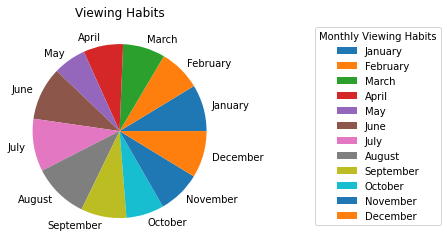

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(month_list)
my_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.pie(y, labels = my_labels)
plt.legend(title = 'Monthly Viewing Habits', bbox_to_anchor = (2, 1.0), loc = 'upper right')
plt.title('Viewing Habits')
plt.show()

In [13]:
new_df = df

new_df.head(1)

,Start Time,Profile Name,Duration,Title,Month
0,2021-09-12 10:41:50-04:00,Grandpa,0 days 00:23:22,The 100: Season 1: The Calm (Episode 11),September


In [14]:
# Just checking what my df looks like again
df

,Start Time,Profile Name,Duration,Title,Month
0,2021-09-12 10:41:50-04:00,Grandpa,0 days 00:23:22,The 100: Season 1: The Calm (Episode 11),September
1,2021-09-11 20:14:47-04:00,Grandpa,0 days 00:12:30,The 100: Season 1: The Calm (Episode 11),September
2,2021-09-11 19:33:55-04:00,Grandpa,0 days 00:40:51,The 100: Season 1: I Am Become Death (Episode 10),September
3,2021-09-11 19:00:09-04:00,Grandpa,0 days 00:33:44,The 100: Season 1: Unity Day (Episode 9),September
4,2021-09-11 16:33:52-04:00,Grandpa,0 days 00:05:07,The 100: Season 1: Unity Day (Episode 9),September
...,...,...,...,...,...
43129,2015-01-15 13:22:19-05:00,The Girls,0 days 00:22:23,That '70s Show: Season 1: Drive-In (Episode 8),January
43130,2015-01-03 19:58:04-05:00,The Girls,0 days 01:30:28,White Chicks,January
43131,2014-12-31 14:56:49-05:00,The Girls,0 days 00:12:30,That '70s Show: Season 1: The Keg (Episode 6),December
43132,2014-12-31 14:33:35-05:00,The Girls,0 days 00:22:31,That '70s Show: Season 1: Eric's Burger Job (E...,December


In [15]:
# Average duration in min month (May) and max month (August)

print('May average duration:', May['Duration'].mean())

print('August average duration:', August['Duration'].mean())

print('\nDespite watching Netflix less often in May, my family still watched Netflix for about the same amount of time as in August.')

May average duration: 0 days 00:25:57.611300720
August average duration: 0 days 00:27:27.579386558

Despite watching Netflix less often in May, my family still watched Netflix for about the same amount of time as in August.


In [16]:
# Other Monthly statistical analysis of min (May) and max (Aug)

print('May median duration:', May['Duration'].median())

print('August median duration:', August['Duration'].median())

print('\nMay standard deviation of duration:', May['Duration'].std())

print('August standard duration:', August['Duration'].std())

print('\nMay min duration:', May['Duration'].min())

print('August min duration:', August['Duration'].min())

print('\nMay max duration:', May['Duration'].max())

print('August max duration:', August['Duration'].max())

May median duration: 0 days 00:21:18
August median duration: 0 days 00:22:01

May standard deviation of duration: 0 days 00:27:13.785660263
August standard duration: 0 days 00:27:25.927012455

May min duration: 0 days 00:00:01
August min duration: 0 days 00:00:01

May max duration: 0 days 05:19:18
August max duration: 0 days 06:37:40


In [17]:
# Also analyzing the Office because it was my whole family's favorite show for awhile

office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

office.sample(20)

,Start Time,Profile Name,Duration,Title,Month
12879,2019-10-12 21:17:25-04:00,Seeking,0 days 00:20:41,The Office (U.S.): Season 5: Heavy Competition...,October
13989,2018-10-15 17:49:38-04:00,Seeking,0 days 00:21:19,The Office (U.S.): Season 4: Branch Wars (Epis...,October
39119,2019-07-12 10:36:39-04:00,The Girls,0 days 00:22:55,The Office (U.S.): Season 1: Pilot (Episode 1),July
12755,2019-11-20 15:54:26-05:00,Seeking,0 days 00:06:21,The Office (U.S.): Season 6: New Leads (Episod...,November
20541,2016-07-20 13:38:20-04:00,Seeking,0 days 00:21:46,The Office (U.S.): Season 7: Threat Level Midn...,July
38685,2019-10-31 20:04:07-04:00,The Girls,0 days 00:20:53,The Office (U.S.): Season 5: Weight Loss: Part...,October
41641,2017-01-12 01:54:25-05:00,The Girls,0 days 00:41:38,"The Office (U.S.): Season 4: Goodbye, Toby (Ep...",January
20567,2016-07-19 17:21:21-04:00,Seeking,0 days 00:21:51,The Office (U.S.): Season 7: Sex Ed (Episode 4),July
28033,2014-03-07 08:38:41-05:00,Seeking,0 days 00:21:25,The Office (U.S.): Season 5: The Surplus (Epis...,March
13920,2018-10-23 16:12:55-04:00,Seeking,0 days 00:20:57,The Office (U.S.): Season 5: Cafe Disco (Episo...,October


In [18]:
office.shape

(1131, 5)

In [19]:
office = office[(office['Duration'] > '0 days 00:01:00')]

office.shape

(1072, 5)

In [20]:
office['Duration'].sum()

Timedelta('14 days 15:45:52')

In [21]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

office.head(1)

,Start Time,Profile Name,Duration,Title,Month,weekday,hour
12546,2019-12-30 19:30:44-05:00,Seeking,0 days 00:50:33,The Office (U.S.): Season 9: Finale (Episode 23),December,0,19


<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

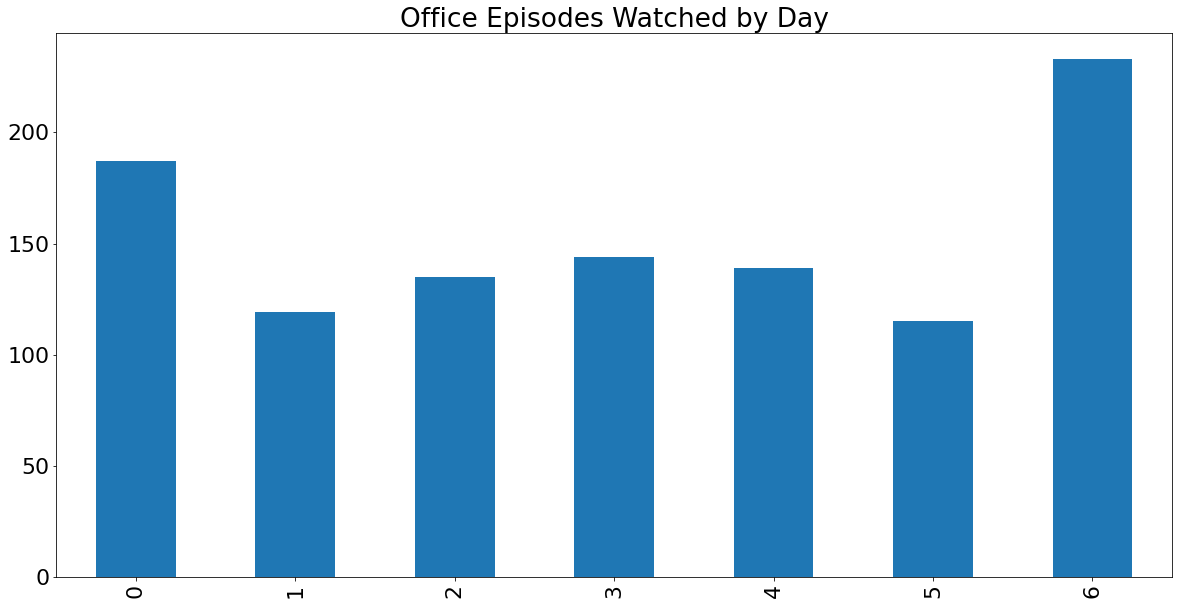

In [22]:
%matplotlib inline
import matplotlib

office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

office_by_day = office['weekday'].value_counts()

office_by_day = office_by_day.sort_index()

matplotlib.rcParams.update({'font.size': 22})

office_by_day.plot(kind= 'bar', figsize=(20,10), title='Office Episodes Watched by Day')

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

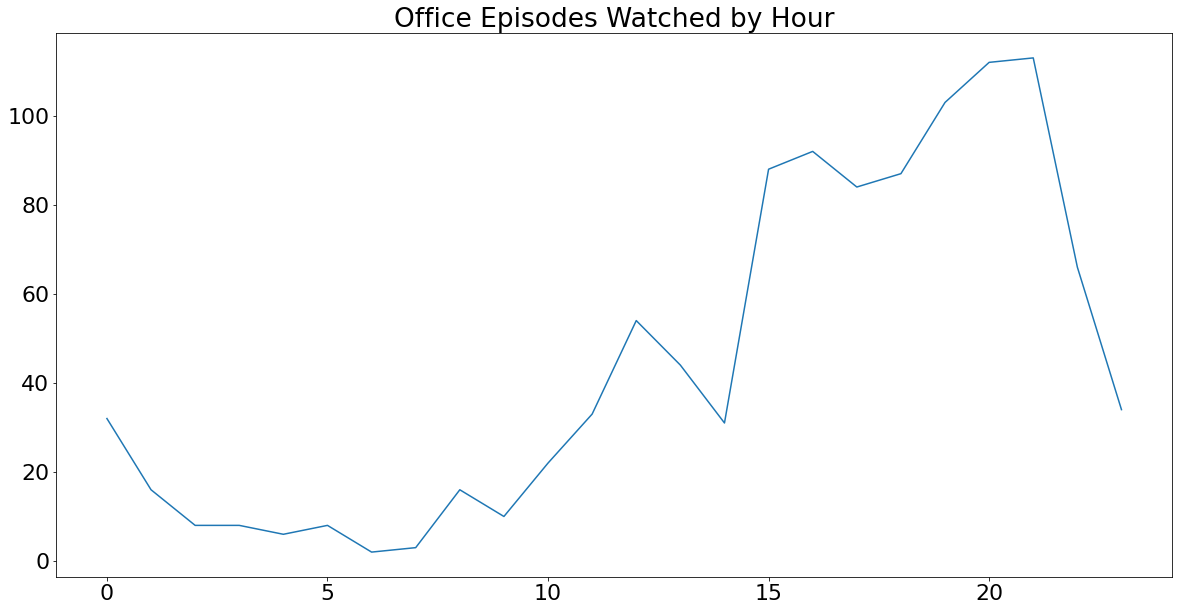

In [23]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

office_by_hour = office['hour'].value_counts()

office_by_hour = office_by_hour.sort_index()

office_by_hour.plot(kind='line', figsize=(20,10), title='Office Episodes Watched by Hour')

In [24]:
# Counting how many times each profile watched netflix for a Pie Chart

watching_list = []

Grandpa = new_df[new_df['Profile Name'].str.contains('Grandpa', regex=True)]
print('Grandpa watched:', Grandpa['Profile Name'].count(), 'times')
watching_list.append(Grandpa['Profile Name'].count())

Seeking = new_df[new_df['Profile Name'].str.contains('Seeking', regex=True)]
print('Mom and Dad watched:', Seeking['Profile Name'].count(), 'times')
watching_list.append(Seeking['Profile Name'].count())

Kids = new_df[new_df['Profile Name'].str.contains('Kids', regex=True)]
print('Kids watched:', Kids['Profile Name'].count(), 'times')
watching_list.append(Kids['Profile Name'].count())

Girls = new_df[new_df['Profile Name'].str.contains('The Girls', regex=True)]
print('The Girls watched:', Girls['Profile Name'].count(), 'times')
watching_list.append(Girls['Profile Name'].count())

Grandpa watched: 1376 times
Mom and Dad watched: 27509 times
Kids watched: 6077 times
The Girls watched: 8172 times


In [25]:
# Checking that my list is correct
print(watching_list)

[1376, 27509, 6077, 8172]


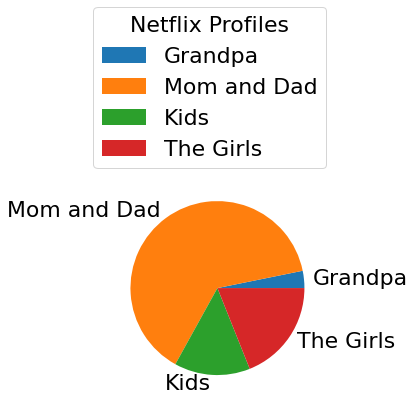

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(watching_list)
my_labels = ['Grandpa', 'Mom and Dad', 'Kids', 'The Girls']

plt.pie(y, labels = my_labels)
plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'lower right')
plt.show()

In [27]:
Grandpa = Grandpa.loc[::-1].reset_index()

Seeking = Seeking.loc[::-1].reset_index()

Kids = Kids.loc[::-1].reset_index()

Girls = Girls.loc[::-1].reset_index()

Grandpa.head()

,index,Start Time,Profile Name,Duration,Title,Month
0,1375,2018-01-07 23:15:11-05:00,Grandpa,0 days 00:25:02,Bright,January
1,1374,2018-01-09 21:48:47-05:00,Grandpa,0 days 00:27:54,Bright,January
2,1373,2018-01-10 06:50:33-05:00,Grandpa,0 days 01:11:03,Bright,January
3,1372,2018-01-10 22:19:20-05:00,Grandpa,0 days 00:52:52,Wanted,January
4,1371,2018-01-11 21:50:09-05:00,Grandpa,0 days 01:16:47,1922,January


In [28]:
# Beginning analysis for multiple line graphs. I am renaming each profile as 1. 
# Works because I already seperated each profile into their own dataframe

Grandpa['Profile Name'] = 1
Grandpa['Count'] = Grandpa['Profile Name'].cumsum()
Grandpa.head()

,index,Start Time,Profile Name,Duration,Title,Month,Count
0,1375,2018-01-07 23:15:11-05:00,1,0 days 00:25:02,Bright,January,1
1,1374,2018-01-09 21:48:47-05:00,1,0 days 00:27:54,Bright,January,2
2,1373,2018-01-10 06:50:33-05:00,1,0 days 01:11:03,Bright,January,3
3,1372,2018-01-10 22:19:20-05:00,1,0 days 00:52:52,Wanted,January,4
4,1371,2018-01-11 21:50:09-05:00,1,0 days 01:16:47,1922,January,5


In [29]:
Seeking['Profile Name'] = 1
Seeking['Count'] = Seeking['Profile Name'].cumsum()
Seeking.head()

,index,Start Time,Profile Name,Duration,Title,Month,Count
0,34961,2010-11-28 14:49:28-05:00,1,0 days 00:50:57,Christmas Classics: Vol. 1,November,1
1,34960,2010-11-28 14:58:58-05:00,1,0 days 00:00:41,"Monsters, Inc.",November,2
2,34959,2010-11-28 16:09:03-05:00,1,0 days 01:34:01,Race to Witch Mountain,November,3
3,34958,2010-11-28 16:42:57-05:00,1,0 days 01:37:51,The Princess and the Frog,November,4
4,34957,2010-11-28 21:11:19-05:00,1,0 days 01:35:04,Legion,November,5


In [30]:
Kids['Profile Name'] = 1
Kids['Count'] = Kids['Profile Name'].cumsum()
Kids.head()

,index,Start Time,Profile Name,Duration,Title,Month,Count
0,7452,2010-11-28 14:49:28-05:00,1,0 days 00:50:57,Christmas Classics: Vol. 1,November,1
1,7451,2010-11-28 14:58:58-05:00,1,0 days 00:00:41,"Monsters, Inc.",November,2
2,7450,2010-11-28 16:09:03-05:00,1,0 days 01:34:01,Race to Witch Mountain,November,3
3,7449,2010-11-28 16:42:57-05:00,1,0 days 01:37:51,The Princess and the Frog,November,4
4,7448,2010-12-01 17:35:32-05:00,1,0 days 01:29:51,Anastasia,December,5


In [31]:
Girls['Profile Name'] = 1
Girls['Count'] = Girls['Profile Name'].cumsum()
Girls.head()

,index,Start Time,Profile Name,Duration,Title,Month,Count
0,43133,2014-12-31 14:20:21-05:00,1,0 days 00:51:47,American Horror Story: Murder House: Pilot (Ep...,December,1
1,43132,2014-12-31 14:33:35-05:00,1,0 days 00:22:31,That '70s Show: Season 1: Eric's Burger Job (E...,December,2
2,43131,2014-12-31 14:56:49-05:00,1,0 days 00:12:30,That '70s Show: Season 1: The Keg (Episode 6),December,3
3,43130,2015-01-03 19:58:04-05:00,1,0 days 01:30:28,White Chicks,January,4
4,43129,2015-01-15 13:22:19-05:00,1,0 days 00:22:23,That '70s Show: Season 1: Drive-In (Episode 8),January,5


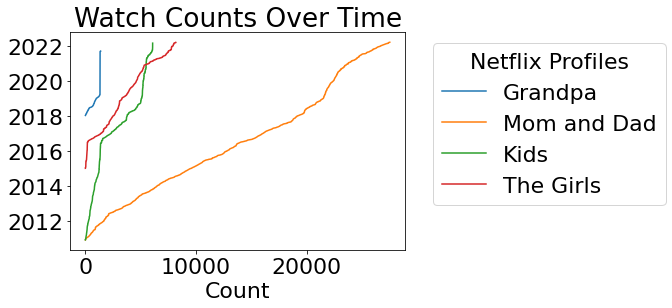

In [32]:
# Displaying the amount of times watched across time

import matplotlib.pyplot as plt
import pandas as pd

ax = Grandpa.plot(x='Count', y='Start Time', label = 'Grandpa')
Seeking.plot(ax=ax, x='Count', y='Start Time', label = 'Mom and Dad')
Kids.plot(ax=ax, x='Count', y='Start Time', label = 'Kids')
Girls.plot(ax=ax, x='Count', y='Start Time', label = 'The Girls', title='Watch Counts Over Time')

plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'upper left')

plt.show()

In [33]:
# Converting duration to seconds then minutes
import datetime

df['DurationInMin'] = df["Duration"].dt.total_seconds()/60

In [34]:
# Statistical Data Analysis

print('All values are in minutes.\n')

print('Average Duration:', df["DurationInMin"].mean())

print('Median Duration:', df["DurationInMin"].median())

print('Max Duration:', df["DurationInMin"].max(), '\n    ^We must have left the TV on, oops')

print('Min Duration:', df["DurationInMin"].min())

print('Standard Deviation of Duration:', df["DurationInMin"].std())

All values are in minutes.

Average Duration: 25.31676596961426
Median Duration: 21.566666666666666
Max Duration: 1007.1500000000001 
    ^We must have left the TV on, oops
Min Duration: 0.016666666666666666
Standard Deviation of Duration: 26.128126535718348


In [35]:
# Adding month column

Grandpa['month'] = Grandpa['Start Time'].dt.month

Seeking['month'] = Seeking['Start Time'].dt.month

Kids['month'] = Kids['Start Time'].dt.month

Girls['month'] = Girls['Start Time'].dt.month

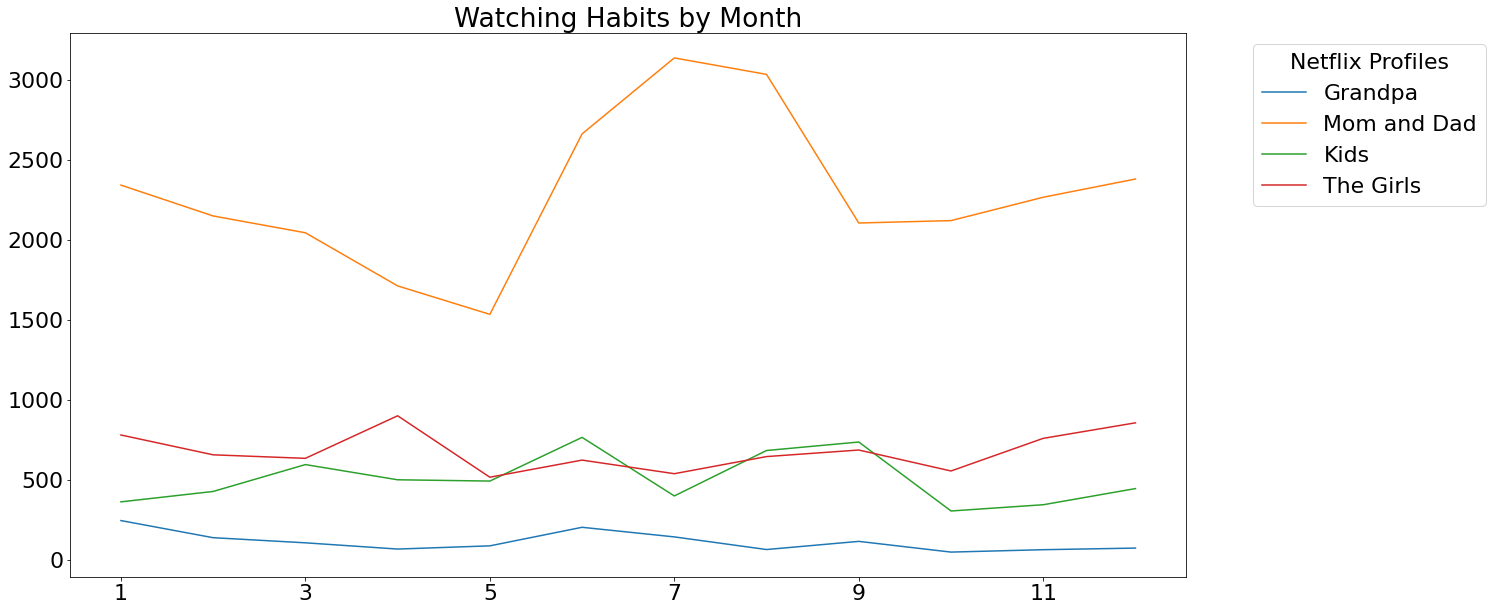

In [36]:
# Monthly summary of when each profile watches netflix the most

Grandpa['month'] = pd.Categorical(Grandpa['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Grandpa_month = Grandpa['month'].value_counts()
Grandpa_month = Grandpa_month.sort_index()

Seeking['month'] = pd.Categorical(Seeking['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Seeking_month = Seeking['month'].value_counts()
Seeking_month = Seeking_month.sort_index()

Kids['month'] = pd.Categorical(Kids['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Kids_month = Kids['month'].value_counts()
Kids_month = Kids_month.sort_index()

Girls['month'] = pd.Categorical(Girls['month'], categories=
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ordered=True)
Girls_month = Girls['month'].value_counts()
Girls_month = Girls_month.sort_index()

ax = Grandpa_month.plot(kind='line', figsize=(20,10), label = 'Grandpa')
Seeking_month.plot(ax=ax, label = 'Mom and Dad')
Kids_month.plot(ax=ax, label = 'Kids')
Girls_month.plot(ax=ax, label = 'The Girls', title='Watching Habits by Month')

plt.legend(title = 'Netflix Profiles', bbox_to_anchor = (1.05, 1.0), loc = 'upper left')

plt.show()

<AxesSubplot:title={'center':'Watching Habits for Whole Account by Month'}>

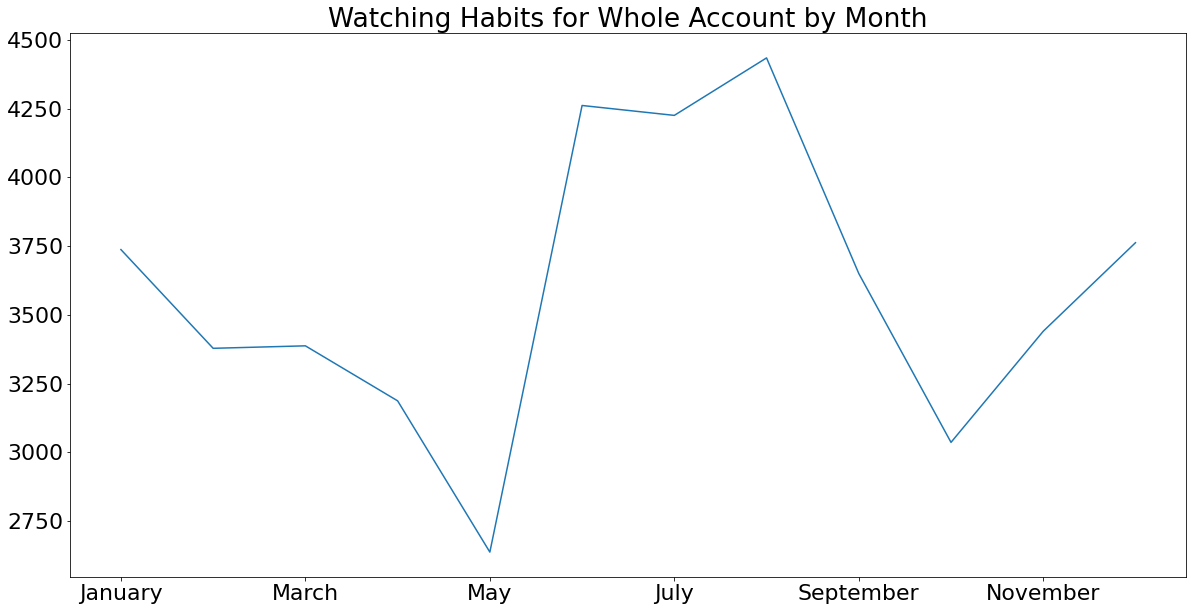

In [37]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

#Reset index such that Jan is 0, Dec is 11

df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

df.sort_values(by = 'Month', inplace = True)

views_month = df['Month'].value_counts()

views_month = views_month.sort_index()

views_month.plot(kind='line', figsize=(20,10), title='Watching Habits for Whole Account by Month')

In [38]:
df

,Start Time,Profile Name,Duration,Title,Month,DurationInMin
41717,2017-01-02 23:26:29-05:00,The Girls,0 days 00:20:47,The Office (U.S.): Season 2: Take Your Daughte...,January,20.783333
15551,2018-01-20 17:49:22-05:00,Seeking,0 days 00:06:59,The Flash: Season 3: Attack on Central City (E...,January,6.983333
15550,2018-01-20 17:57:22-05:00,Seeking,0 days 00:08:04,The Flash: Season 3: The Present (Episode 9),January,8.066667
15549,2018-01-20 18:21:04-05:00,Seeking,0 days 00:01:26,The Flash: Season 3: The Present (Episode 9),January,1.433333
15548,2018-01-20 18:25:29-05:00,Seeking,0 days 00:03:12,The Flash: Season 3: Finish Line (Episode 23),January,3.200000
...,...,...,...,...,...,...
8460,2021-12-13 20:18:48-05:00,Seeking,0 days 00:00:59,Father of the Year (Trailer),December,0.983333
8461,2021-12-13 20:17:27-05:00,Seeking,0 days 00:00:57,Sebastian Maniscalco: Stay Hungry (Trailer),December,0.950000
8462,2021-12-13 20:16:55-05:00,Seeking,0 days 00:00:04,Trailer: Extraction,December,0.066667
8446,2021-12-13 20:26:56-05:00,Seeking,0 days 00:00:07,Trailer: The Misadventures of Hedi and Cokeman,December,0.116667
